## Clustering of Credit Card Customers for Marketing

### About this Dataset

This case requires to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### Following is the Data Dictionary for Credit Card dataset :

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

The dataset may be downloaded as a csv file here: https://www.kaggle.com/arjunbhasin2013/ccdata

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



### Read data file

In [2]:
full_creditcard_df = pd.read_csv("marketing_data.csv")

### Let's examine the dataset and perform exploratory data analysis

In [3]:
full_creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
full_creditcard_df.isnull().values.any()

True

### Lets see which columns have nulls

In [5]:
full_creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Lets impute data for the features that have nulls, we will use the mean

In [6]:

full_creditcard_df.loc[full_creditcard_df['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS'] =  full_creditcard_df['MINIMUM_PAYMENTS'].mean()

full_creditcard_df.loc[full_creditcard_df['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT'] = full_creditcard_df['CREDIT_LIMIT'].mean()


In [7]:
full_creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Statistical Information

In [8]:
full_creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Quick peak at top few rows

In [9]:
full_creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Let's drop the CUST_ID (categorical) as it's not relevant to the clustering analysis

In [10]:
creditcard_working_df = full_creditcard_df.drop("CUST_ID", axis = 1)

In [11]:
creditcard_working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Plot the distribution for each feature

/Users/moni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/moni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/moni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

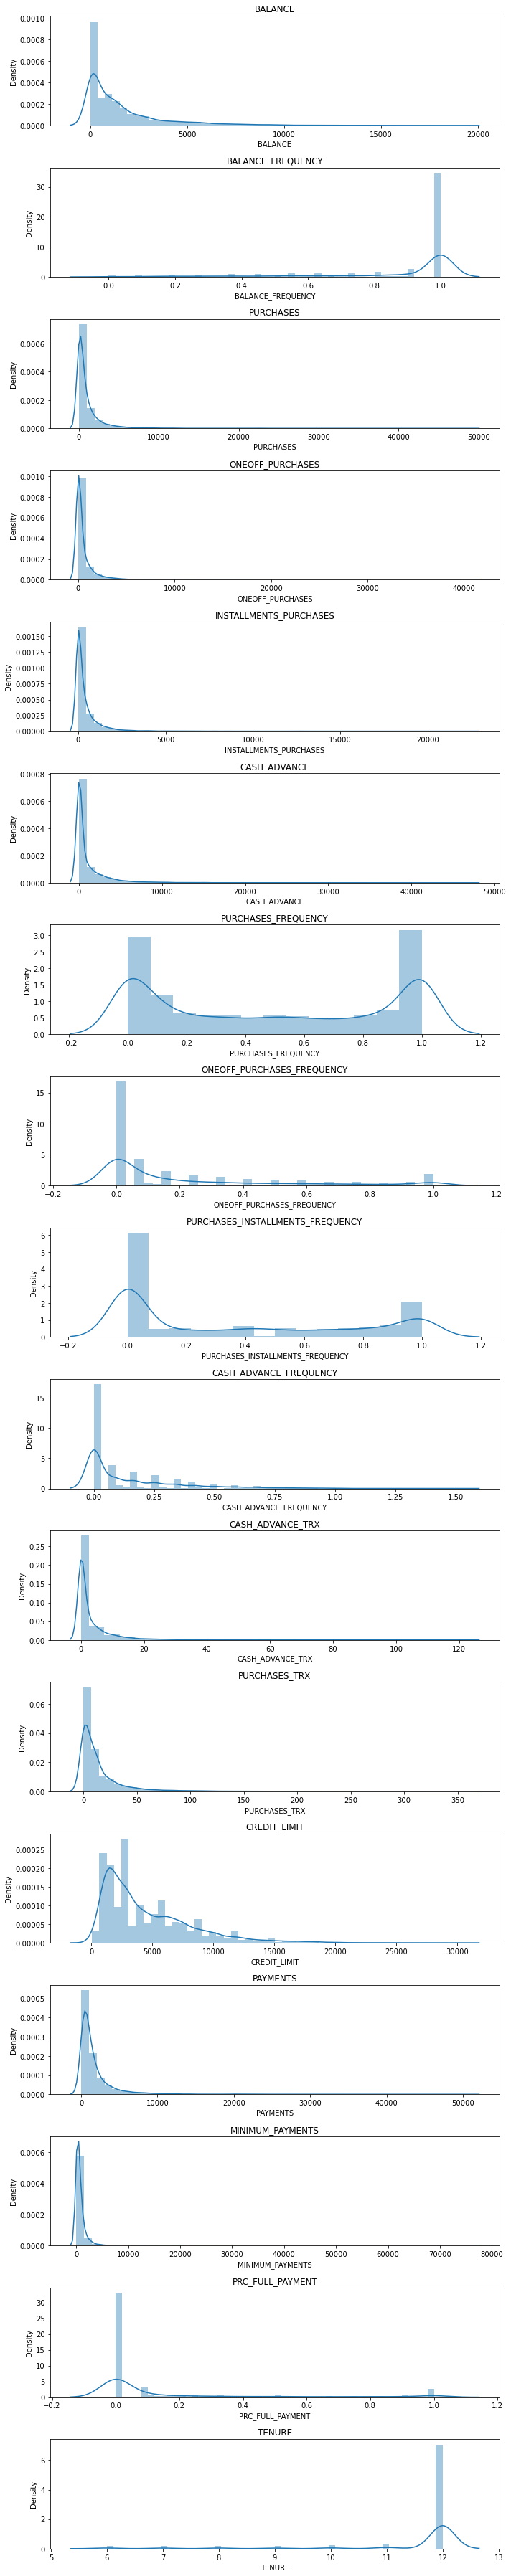

In [12]:
plt.figure(figsize=(10,50))

for i in range(len(creditcard_working_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_working_df[creditcard_working_df.columns[i]], kde = True)
  plt.title(creditcard_working_df.columns[i])
plt.tight_layout();

#### Our data seems to be skewed all over, although in the context of credit cards it might be expected.
#### Depending on the context our our application, we may or may not address these by either some form of transformation or by dropping the outliers. For the purpose of this notebook which primarily focused on the basic understanding of KMeans clustering implementation, will will not be transforming or dropping the data.

### Correlation Matrix and Viz

In [13]:
creditcard_working_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<AxesSubplot:>

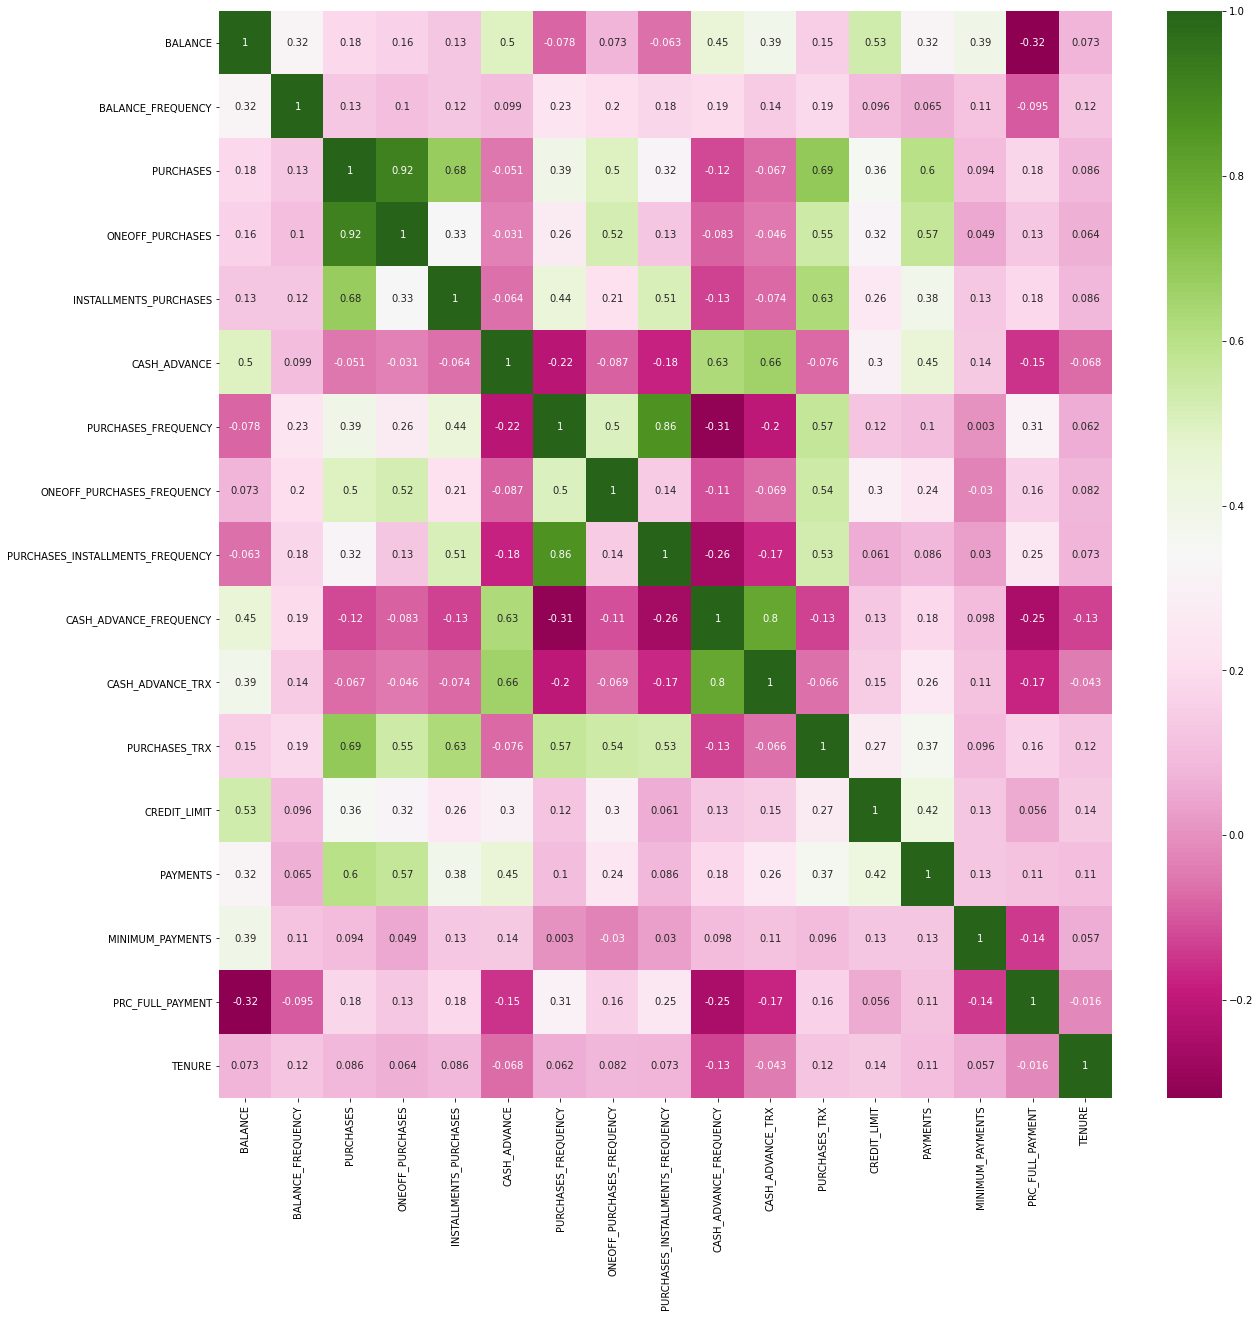

In [14]:
plt.figure(figsize=(20, 20))
sns.color_palette("plasma", 8)
sns.heatmap(creditcard_working_df.corr(), cmap = 'PiYG' , annot=True )


#### Above we see that correlation between many of the features seems to pretty strong, this will come in handy when we get to the PCA Analysis

### Scale/Normalize Data

In [15]:
scaler = StandardScaler()
creditcard_working_scaled_df = scaler.fit_transform(creditcard_working_df)
creditcard_working_scaled_df.shape


(8950, 17)

### We first must establish what is the optimum number of clusters to use in our model 
### Let's employ the elbow method to determine optimum k value


In [16]:
wcss = [] 

cluster_range = range(1,25)
#cluster_range_shadow = range (2,25)
silhouette_avg = []

for i in cluster_range:
    kmeans_model = KMeans(n_clusters = i)
    kmeans_model.fit(creditcard_working_scaled_df)
    wcss.append(kmeans_model.inertia_)
    
    cluster_labels = kmeans_model.labels_
    if (i!= 1):
        silhouette_avg.append(silhouette_score(creditcard_working_scaled_df, cluster_labels))
   


In [17]:
print(wcss)

[152149.9999999988, 127784.9305142328, 111986.36616291181, 99074.37425485573, 91503.39081843318, 84851.13240432614, 79753.54666211364, 74491.1353892951, 71560.7741799066, 66594.42768038856, 63783.291961623894, 61384.12522290837, 59147.67453718826, 57493.62187065117, 56103.90610329525, 54754.08864033354, 52995.59671344772, 51877.907799804445, 50839.11083838004, 49606.33272511515, 48418.3463347649, 47749.34074066554, 46496.80965698674, 45660.72135262497]


Text(0, 0.5, 'WCSS')

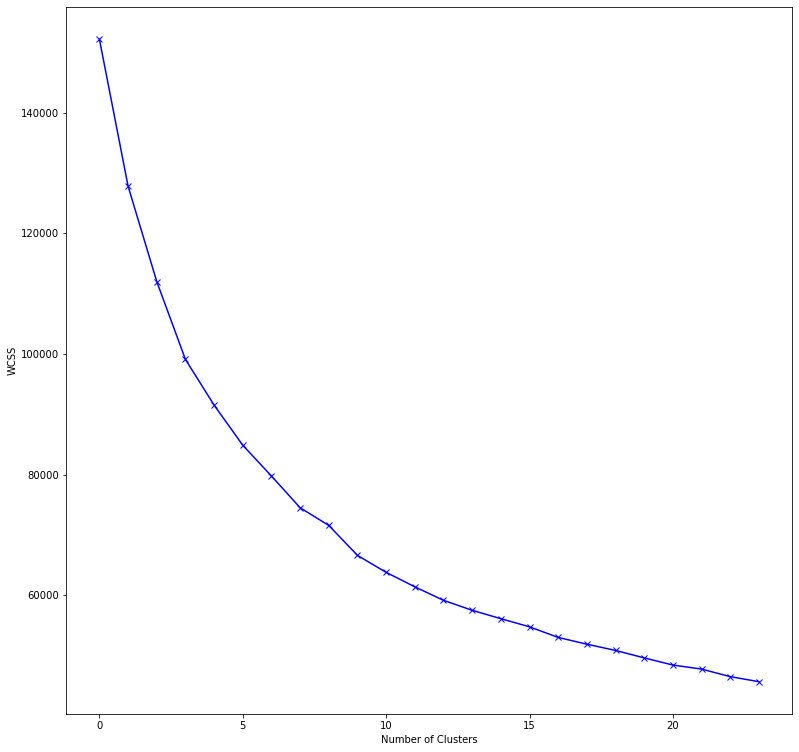

In [18]:
plt.figure(figsize=(13,13))
plt.plot(wcss, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")


### Above we observe that perhaps, 8 seems to be appropriate value for our KMeans model 


### Let's plot the Silhouette score, and try to estimate K from the plot

Text(0, 0.5, 'Silhouette Score')

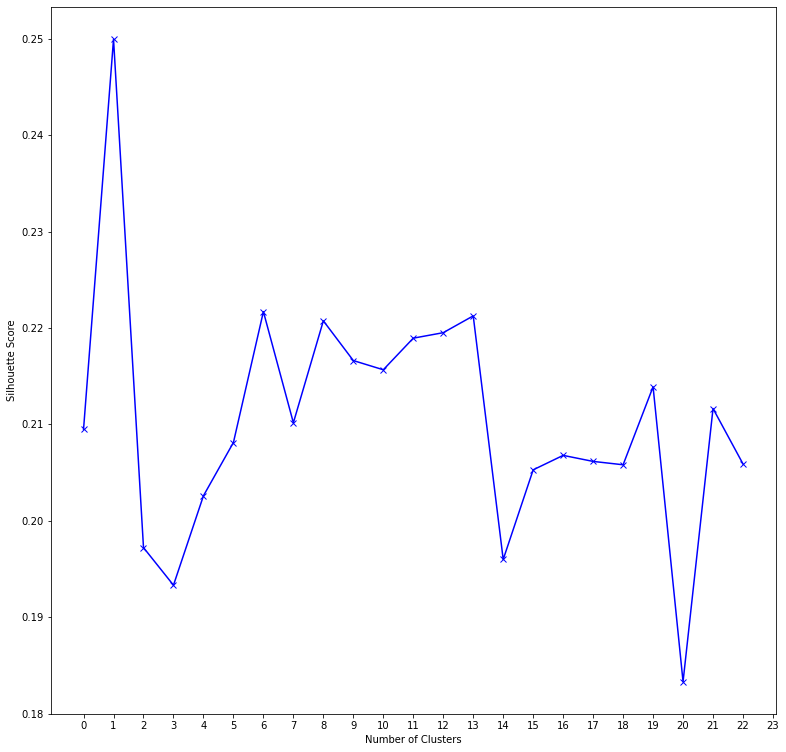

In [20]:
plt.figure(figsize=(13,13))
x = np.arange(0, 26, 1)
plt.xticks(x)
plt.plot(silhouette_avg, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")


# Silhouette scores lie between -1 and +1.
# Score of 0, implies overlapping cluster. 
# Closer the value to 1 the better and more compact the cluster


### Above, we observe that shilouette analysis indicates that, 2 might be an appropriate value for our KMeans model 

### Lets fit KMeans Model to our scaled data (with k=8 for the purpose of this notebook)

In [21]:
kmeans_model = KMeans(8)
kmeans_model.fit(creditcard_working_scaled_df)
labels = kmeans_model.labels_

In [22]:
labels = kmeans_model.labels_

### We observe below that, have a label for each of the the rows in our dataset

In [23]:
len(labels)

8950

### The labels for the cluster are from 0-7

In [24]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

### Below, we see the count of # of customers per cluster

In [25]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1185,  877, 1128, 2018, 2771,  323,  625,   23]))

### Lets examine the cluster centers

In [26]:
kmeans_model.cluster_centers_

array([[-7.00916307e-01, -2.13591944e+00, -3.09789969e-01,
        -2.34351341e-01, -3.01834878e-01, -3.22887417e-01,
        -5.52623132e-01, -4.40210012e-01, -4.38526300e-01,
        -5.22022806e-01, -3.76647980e-01, -4.18105245e-01,
        -1.75015786e-01, -2.01944724e-01, -2.57045690e-01,
         2.84043713e-01,  2.01772558e-01],
       [ 1.66940391e+00,  3.90094937e-01, -2.21249183e-01,
        -1.57448638e-01, -2.33945544e-01,  2.00614436e+00,
        -4.82681987e-01, -2.12972876e-01, -4.22982924e-01,
         1.91899754e+00,  1.92598303e+00, -2.71367457e-01,
         1.01550904e+00,  8.16635128e-01,  5.07443431e-01,
        -3.90751482e-01,  7.18371704e-02],
       [-1.17080946e-01,  4.03006141e-01,  5.80440452e-01,
         7.03602512e-01,  7.96026950e-02, -3.31977427e-01,
         9.98641336e-01,  1.91410166e+00,  2.14407541e-01,
        -4.17082689e-01, -3.32781593e-01,  6.66359983e-01,
         4.68196768e-01,  1.72189205e-01, -1.55047007e-01,
         4.60736446e-01,  2.7

In [27]:
kmeans_model.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans_model.cluster_centers_, columns=[creditcard_working_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700916,-2.135919,-0.309790,-0.234351,-0.301835,-0.322887,-0.552623,-0.440210,-0.438526,-0.522023,-0.376648,-0.418105,-0.175016,-0.201945,-0.257046,0.284044,0.201773
1,1.669404,0.390095,-0.221249,-0.157449,-0.233946,2.006144,-0.482682,-0.212973,-0.422983,1.918998,1.925983,-0.271367,1.015509,0.816635,0.507443,-0.390751,0.071837
2,-0.117081,0.403006,0.580440,0.703603,0.079603,-0.331977,0.998641,1.914102,0.214408,-0.417083,-0.332782,0.666360,0.468197,0.172189,-0.155047,0.460736,0.275224
3,-0.358225,0.332237,-0.029857,-0.240689,0.371394,-0.362537,0.996092,-0.380834,1.207247,-0.471898,-0.359596,0.194768,-0.259684,-0.213155,-0.029720,0.312698,0.255518
4,0.011240,0.405020,-0.354335,-0.238911,-0.398790,-0.098672,-0.842068,-0.383299,-0.751677,0.095259,-0.034770,-0.477911,-0.304686,-0.251732,-0.008165,-0.455202,0.273038
5,1.108894,0.475193,2.594940,1.861504,2.715919,-0.122715,1.169176,1.570563,1.290972,-0.265499,-0.123567,3.251353,1.349204,1.531278,0.691210,0.247010,0.335232
6,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


### We need to inverse transform the data so we can get some real context 

In [29]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_working_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.576699,0.371291,341.333789,203.462143,138.122110,301.761115,0.268556,0.071134,0.190156,0.030682,0.678481,4.317300,3857.670417,1148.533664,265.172405,0.236793,11.787342
1,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
2,1320.780722,0.972739,2243.324805,1760.273431,483.051374,282.698940,0.891154,0.773471,0.449648,0.051682,0.977837,31.273050,6197.940845,2231.614729,502.876032,0.288472,11.885638
3,818.859626,0.955975,939.415560,192.943370,746.914846,218.614646,0.890131,0.088848,0.844228,0.040713,0.794846,19.551041,3549.613579,1116.079935,794.944505,0.245173,11.859267
4,1587.869436,0.973216,246.161891,195.893630,50.446853,771.950425,0.152388,0.088112,0.065702,0.154206,3.011548,2.830747,3385.877541,1004.403081,845.178372,0.020576,11.882714
5,3872.543622,0.989840,6547.334644,3682.153096,2867.039133,721.532763,0.959598,0.670987,0.877503,0.082015,2.405573,95.526316,9403.405573,6166.044918,2475.042173,0.225961,11.965944
6,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [30]:
cluster_centers.shape

(8, 17)

In [31]:
labels.shape

(8950,)

In [32]:
labels

array([4, 1, 2, ..., 6, 6, 6], dtype=int32)

In [33]:
creditcard_working_with_cluster_df = pd.concat([creditcard_working_df, pd.DataFrame({'CLUSTER_LABEL': labels})], axis = 1)
creditcard_working_with_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_LABEL
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


In [34]:
creditcard_working_with_cluster_df
full_creditcard_df = pd.concat([full_creditcard_df, pd.DataFrame({'CLUSTER_LABEL': labels})], axis = 1)
full_creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_LABEL
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


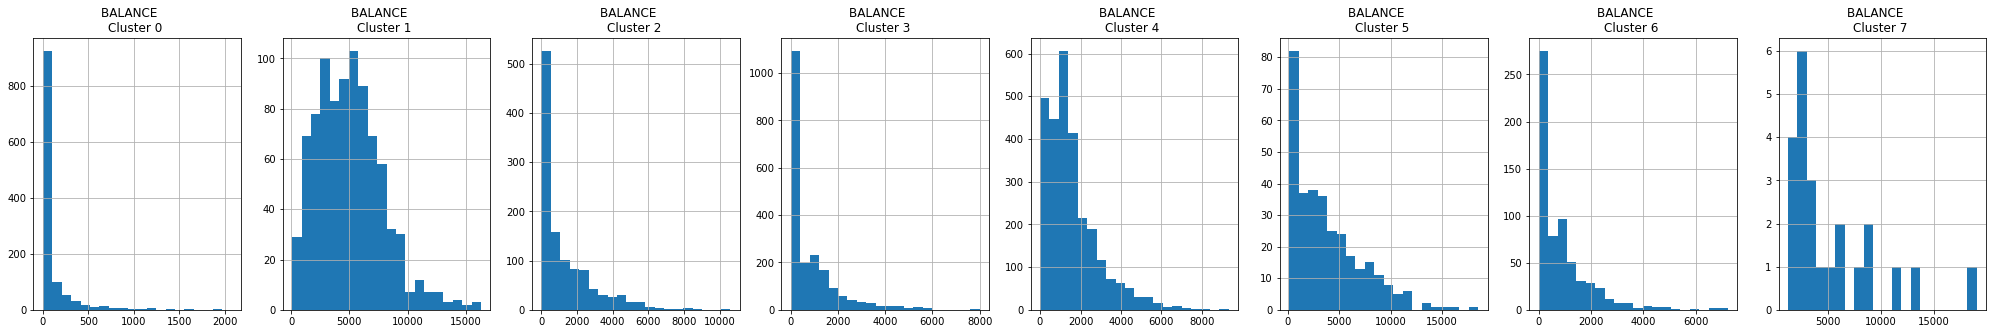

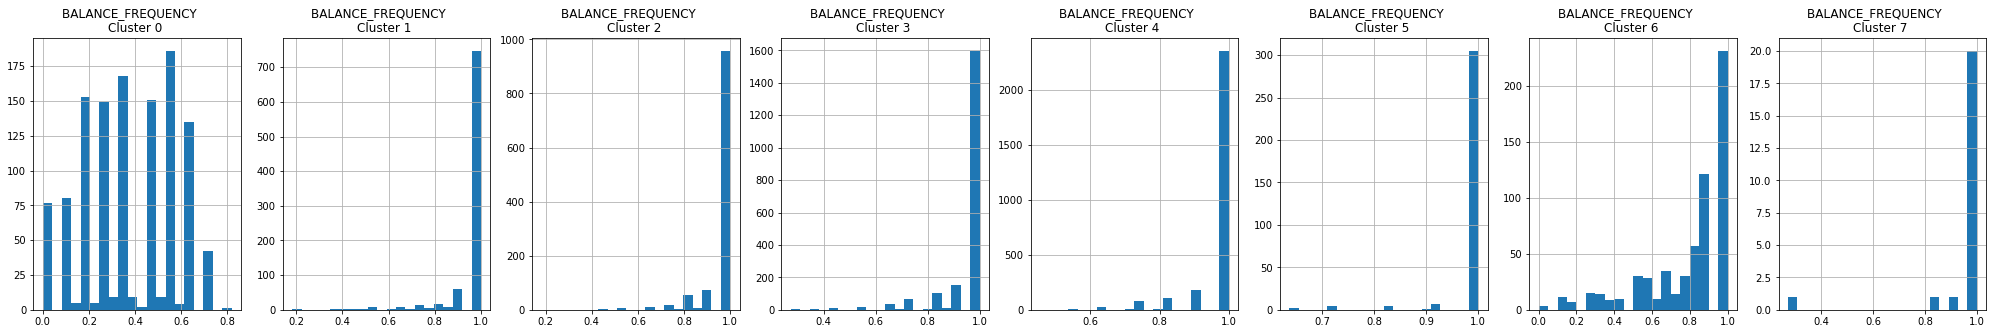

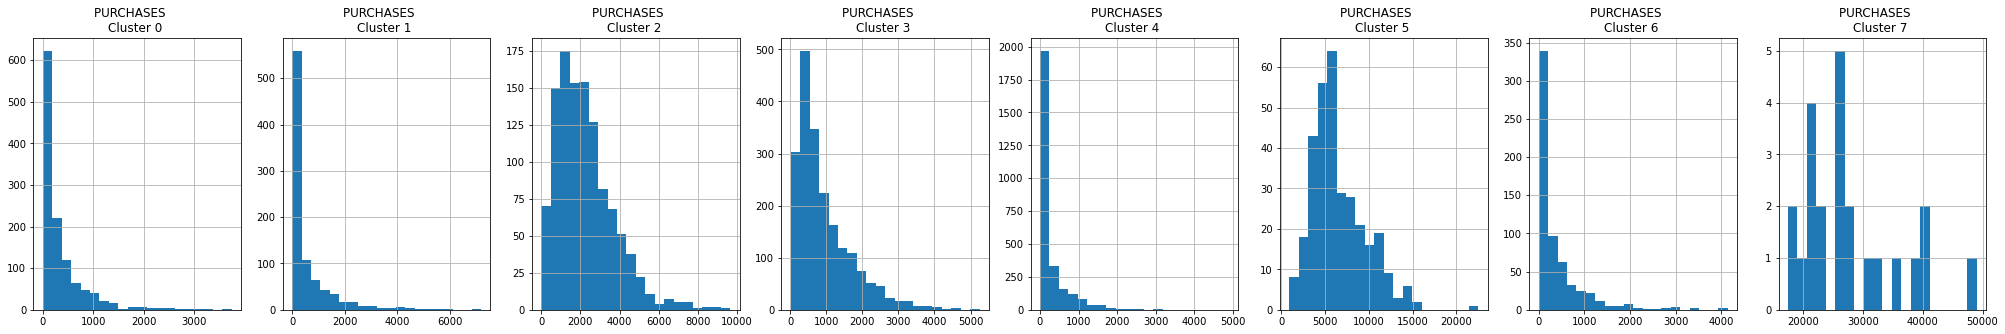

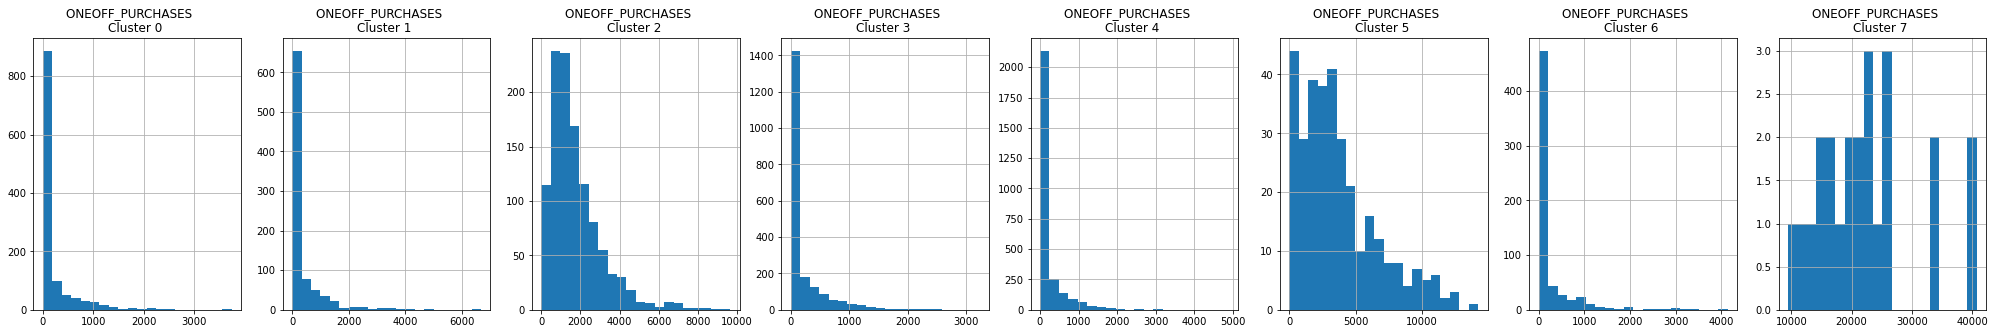

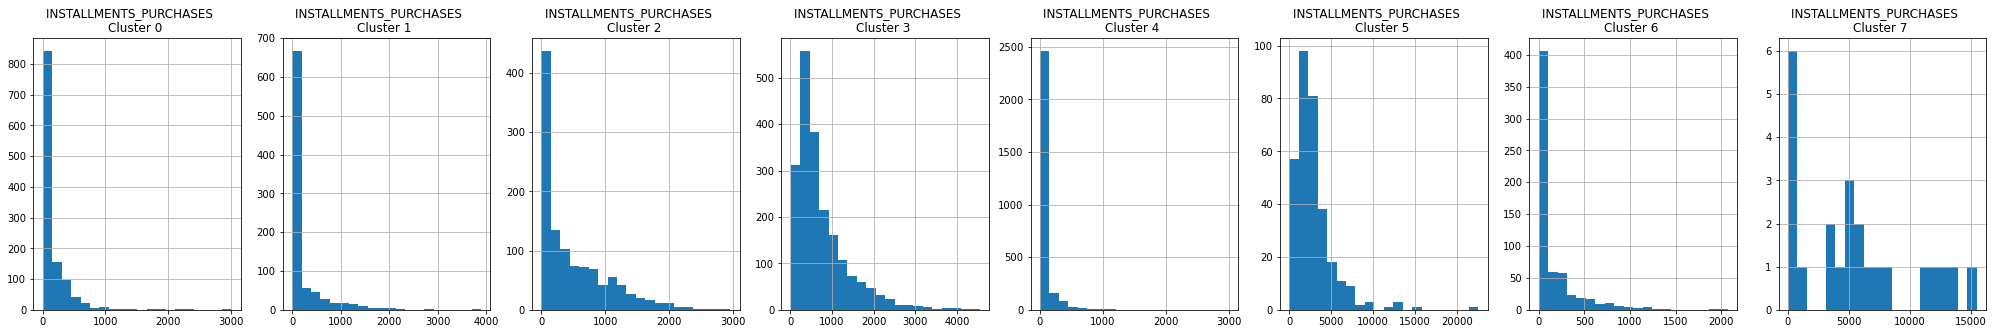

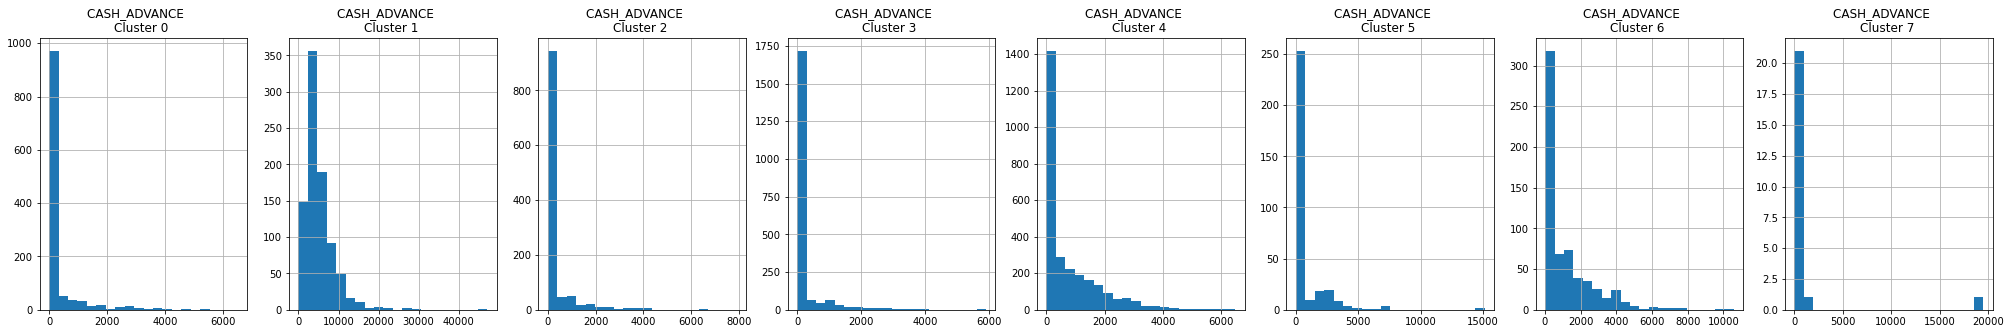

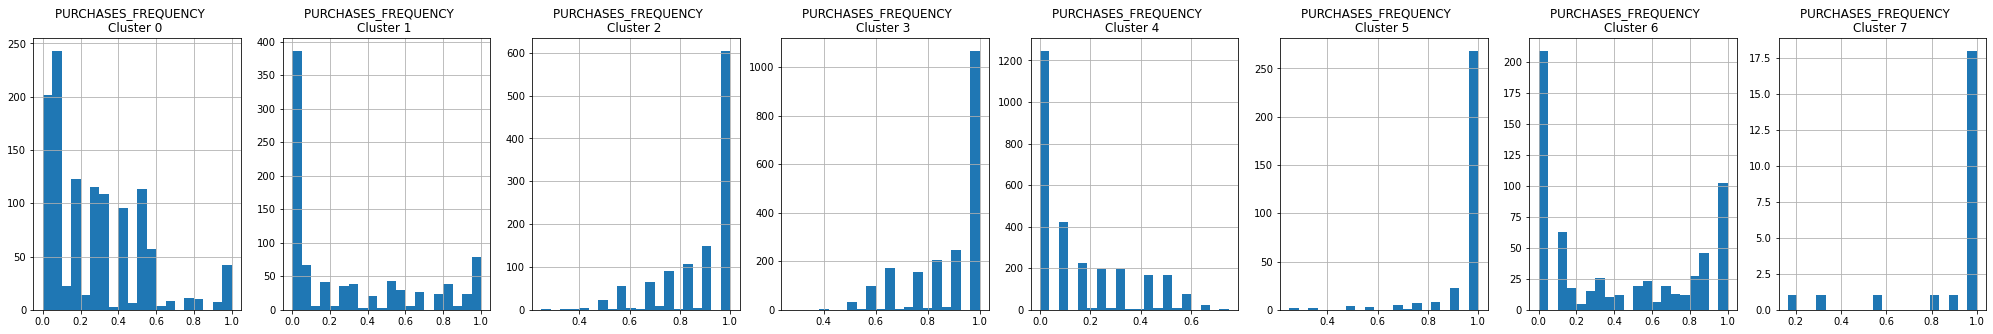

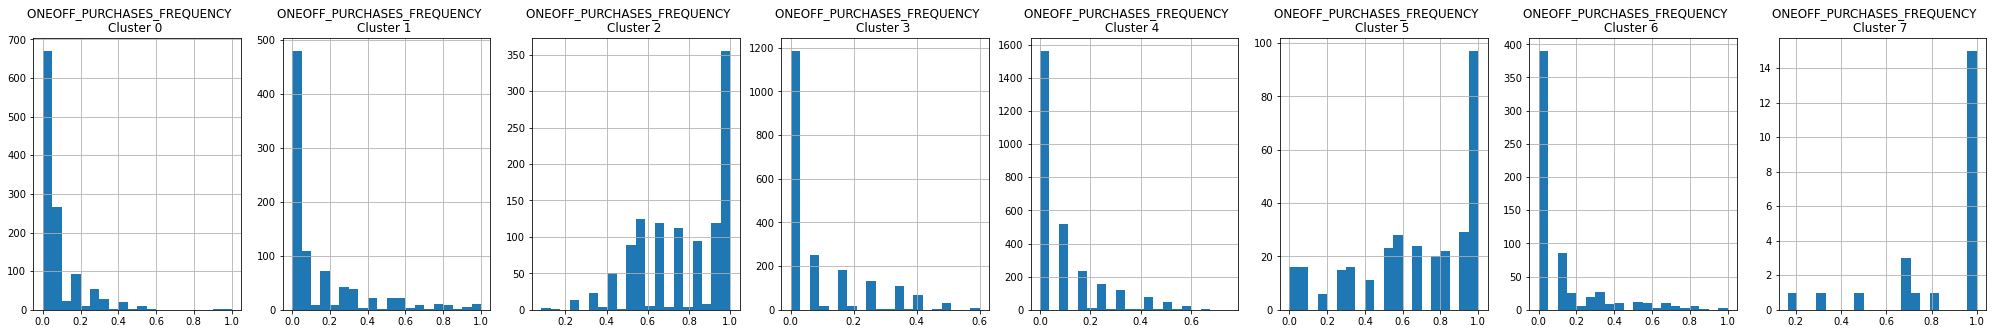

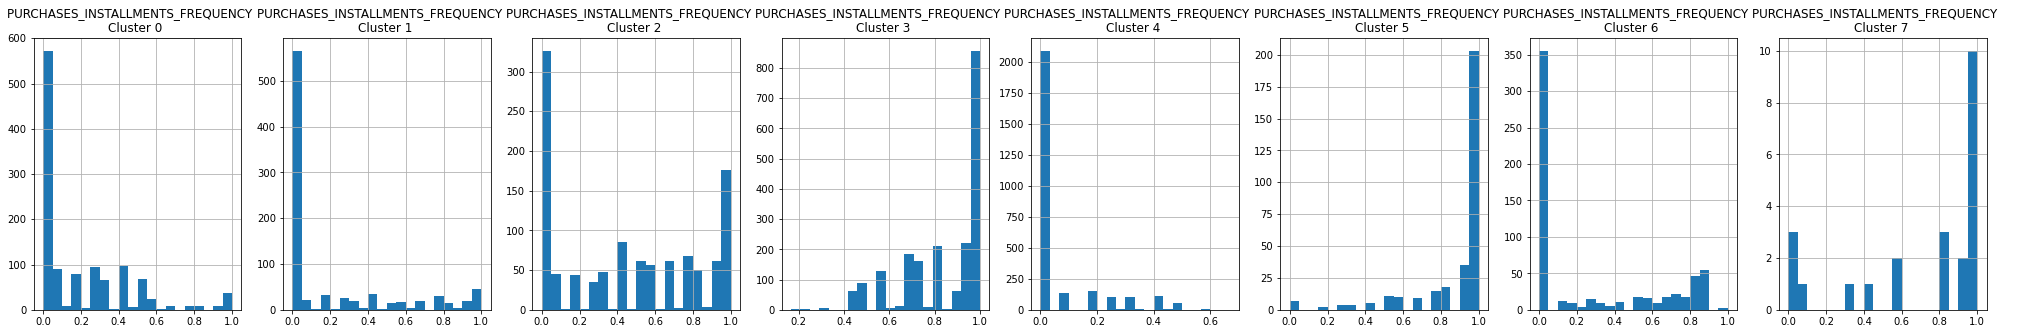

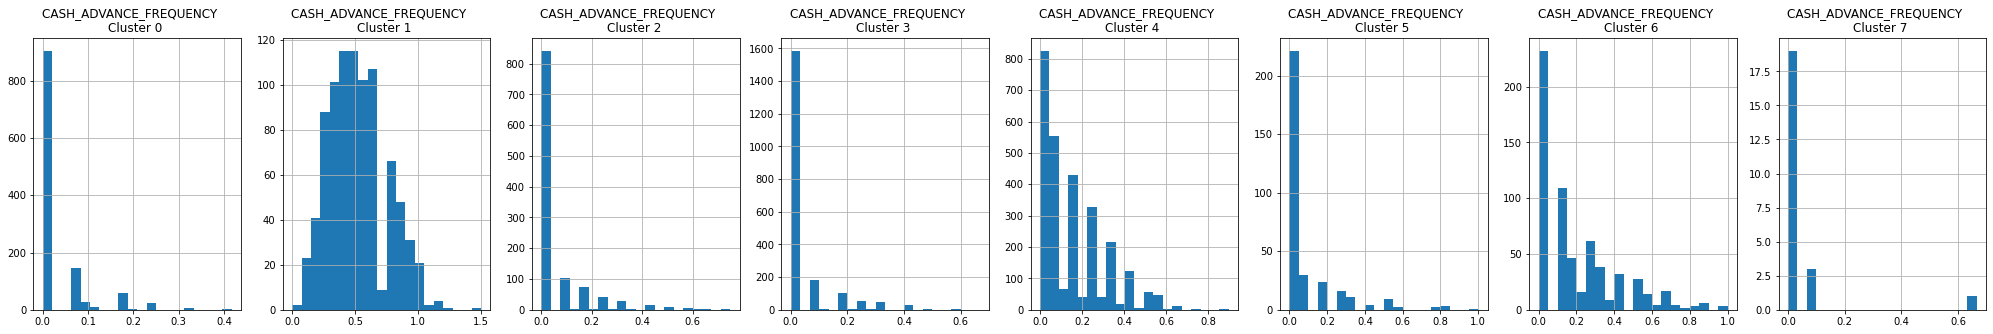

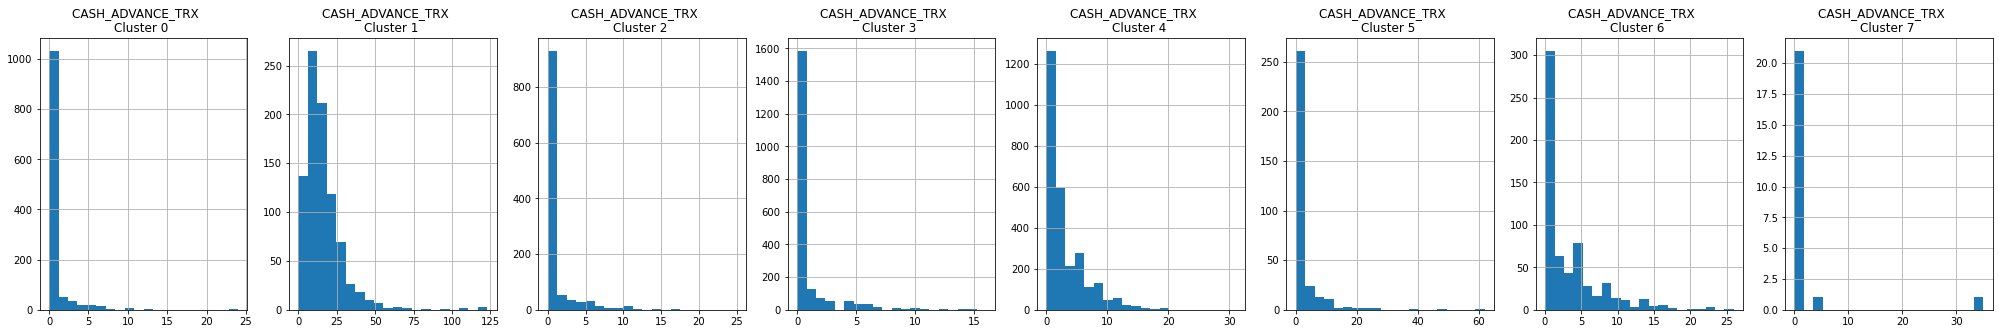

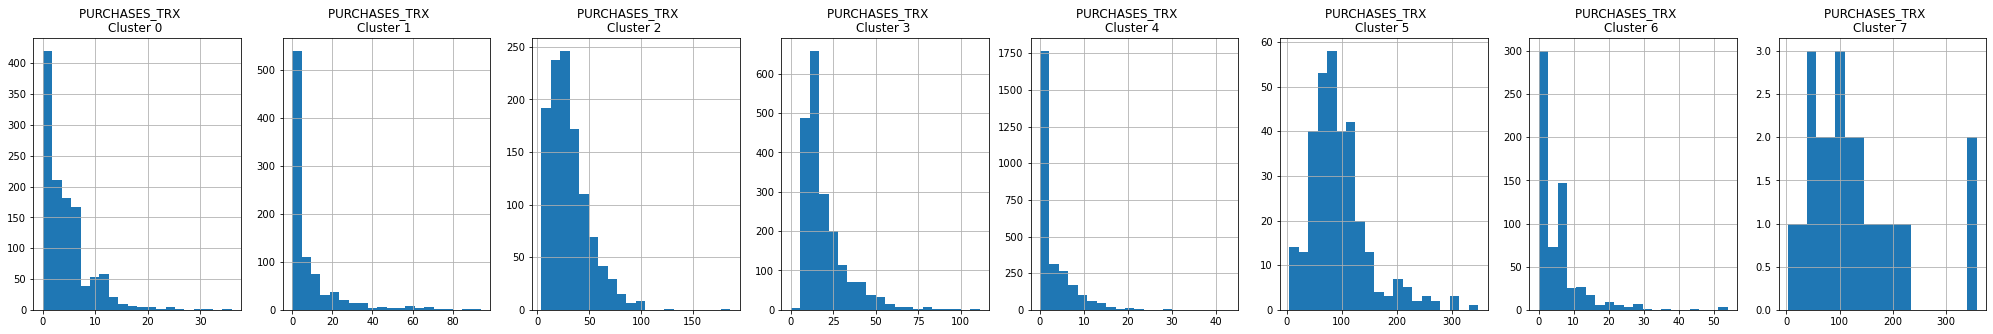

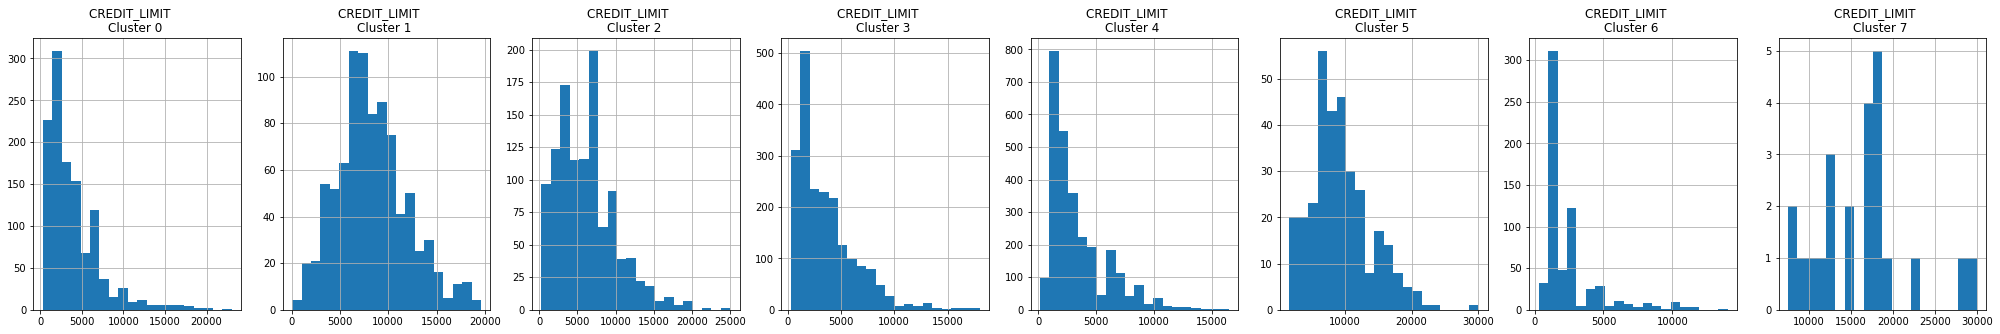

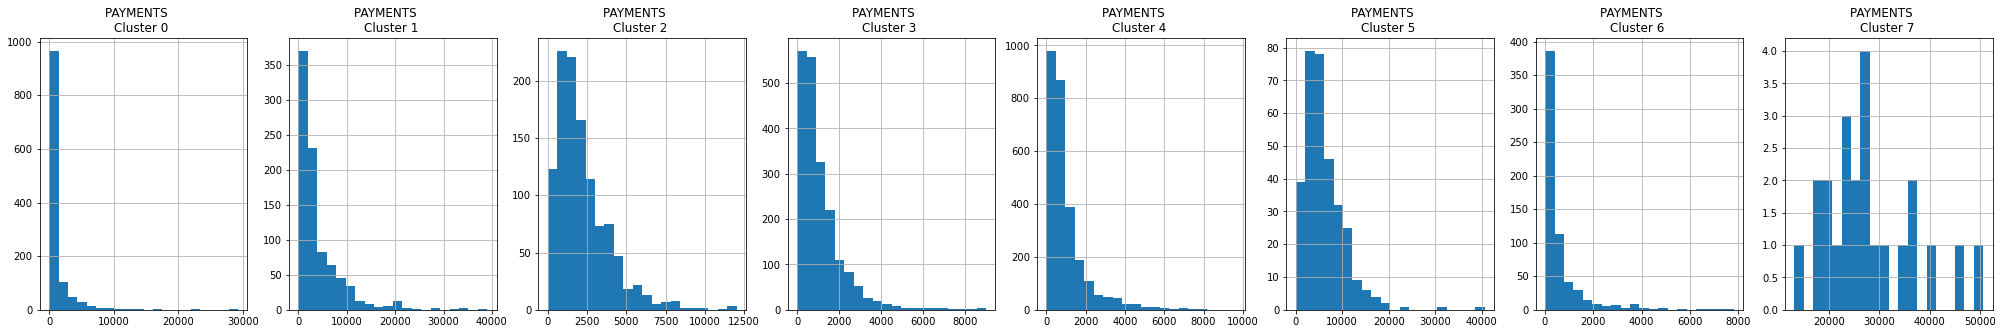

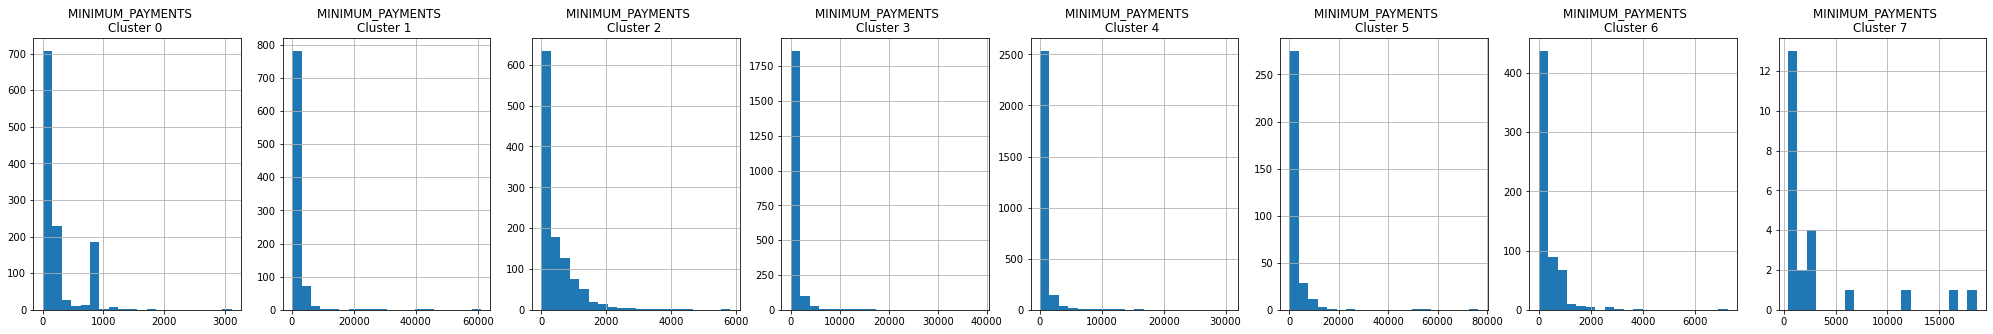

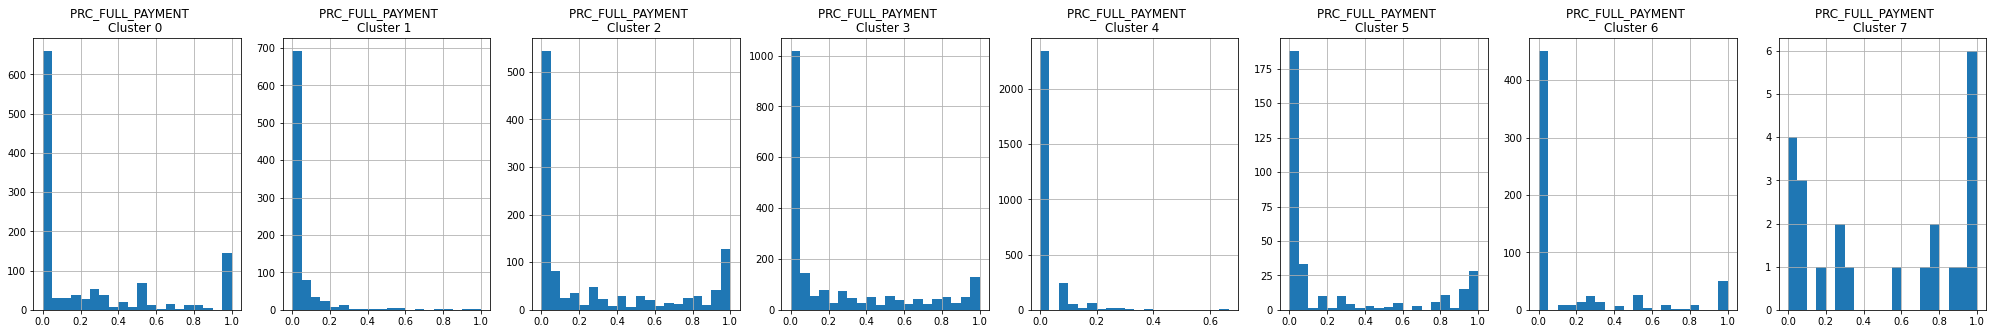

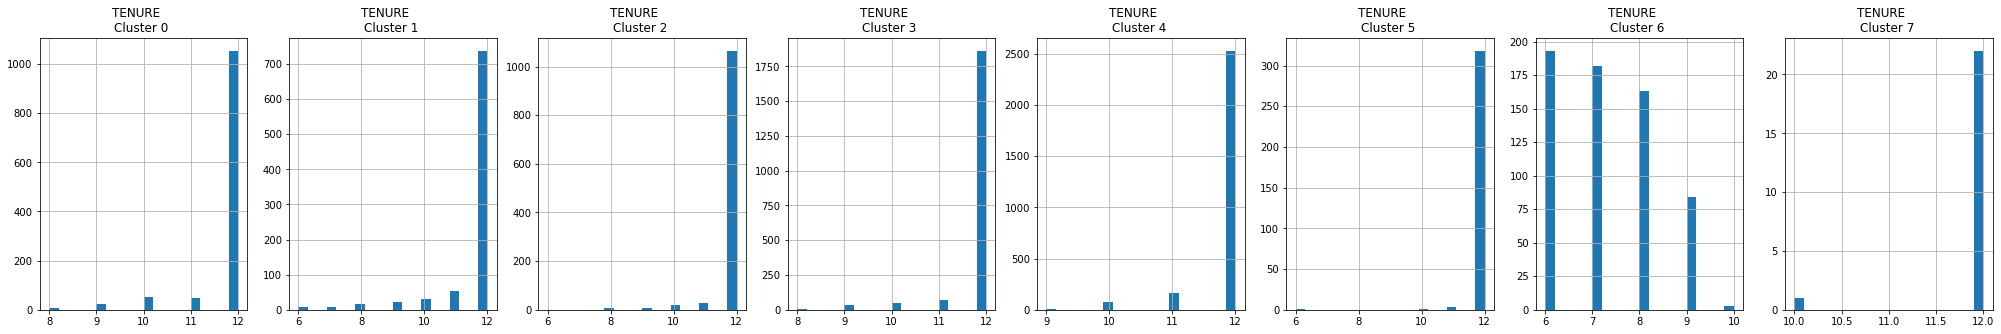

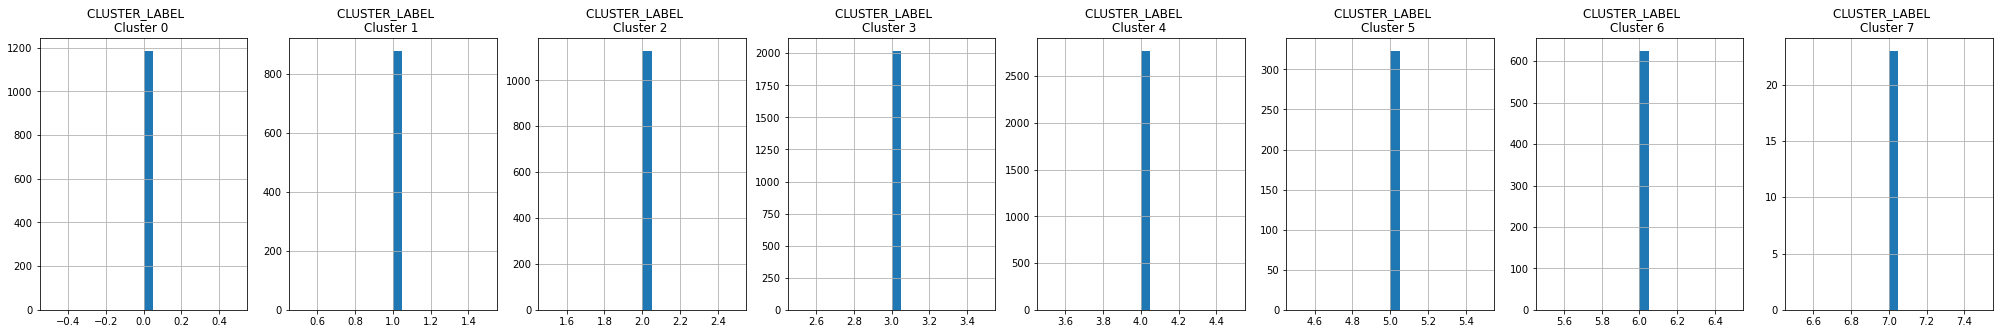

In [35]:

for i in creditcard_working_with_cluster_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_working_with_cluster_df[creditcard_working_with_cluster_df['CLUSTER_LABEL'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


### PCA Analysis 
#### This analysis attempts to perform dimensionality reduction without losing information

In [36]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_working_scaled_df)
principal_comp

array([[-1.68221755, -1.07645496],
       [-1.13828799,  2.50645384],
       [ 0.96968116, -0.38353131],
       ...,
       [-0.92620274, -1.81078366],
       [-2.33655235, -0.6579529 ],
       [-0.55642913, -0.4004554 ]])

In [37]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682218,-1.076455
1,-1.138288,2.506454
2,0.969681,-0.383531
3,-0.873623,0.043168
4,-1.599432,-0.688586


In [38]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER_LABEL': labels})], axis = 1)
pca_df.head()

,pca1,pca2,CLUSTER_LABEL
0,-1.682218,-1.076455,4
1,-1.138288,2.506454,1
2,0.969681,-0.383531,2
3,-0.873623,0.043168,4
4,-1.599432,-0.688586,4


### Visualize the clusters 

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

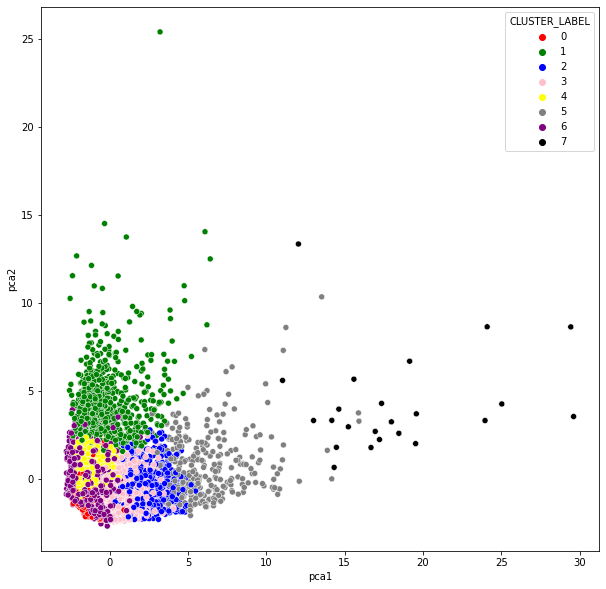

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER_LABEL', 
                data = pca_df, 
                palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

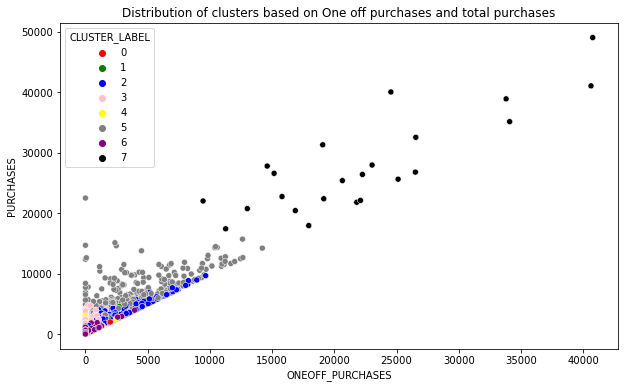

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=creditcard_working_with_cluster_df, 
                x='ONEOFF_PURCHASES', 
                y='PURCHASES', 
                hue='CLUSTER_LABEL',
                palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()